In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df1 = pd.read_csv('train_dataset.csv')
df1

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,spongiosis,follicular_horn_plug,inflammatory_mononuclear_infiltrate,age,class
0,2,3,2,3,3,2,0,2,0,0,...,0,0,0,3,2,1,0,2,27,3
1,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,52,5
2,2,2,2,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,30,4
3,2,2,1,0,1,0,0,0,0,0,...,0,0,0,0,1,3,0,2,62,4
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,3,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1,1,0,1,0,0,3,0,1,0,...,0,0,0,0,0,0,1,1,9,6
530,2,1,1,0,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,12,6
531,2,2,0,0,0,0,2,0,2,1,...,0,0,0,0,0,1,2,2,7,6
532,2,1,2,0,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,11,6


In [2]:
X_train_sm = df1.drop('class', axis=1)
y_train_sm = df1['class']

In [3]:
import pandas as pd
df2 = pd.read_csv('test_dataset.csv')
df2

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,spongiosis,follicular_horn_plug,inflammatory_mononuclear_infiltrate,age,class
0,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,36,2
1,3,1,2,3,2,2,0,2,0,0,...,0,0,0,2,0,0,0,3,16,3
2,2,1,2,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,35,4
3,1,3,1,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,3,60,1
4,3,2,1,0,2,0,0,0,0,0,...,0,0,0,0,0,3,0,2,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,2,2,2,1,2,0,2,0,0,...,0,0,0,2,0,3,0,2,36,3
70,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,30,2
71,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,27,4
72,2,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,2,35,2


In [4]:
X_test = df2.drop('class',axis=1)
y_test = df2['class']

In [6]:
# Decision Tree with Scaling (pipeline)
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Pipeline = Scaling + Decision Tree
dt_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("dt", DecisionTreeClassifier(
            random_state=42,
            max_depth=None,
            min_samples_leaf=1
        ))
])

# 2) Train on SMOTE-balanced set
dt_pipeline.fit(X_train_sm, y_train_sm)

# 3) Predict
y_pred_dt = dt_pipeline.predict(X_test)

# 4) Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9324324324324325

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.82      0.75      0.78        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       0.75      0.75      0.75         4

    accuracy                           0.93        74
   macro avg       0.90      0.90      0.90        74
weighted avg       0.93      0.93      0.93        74



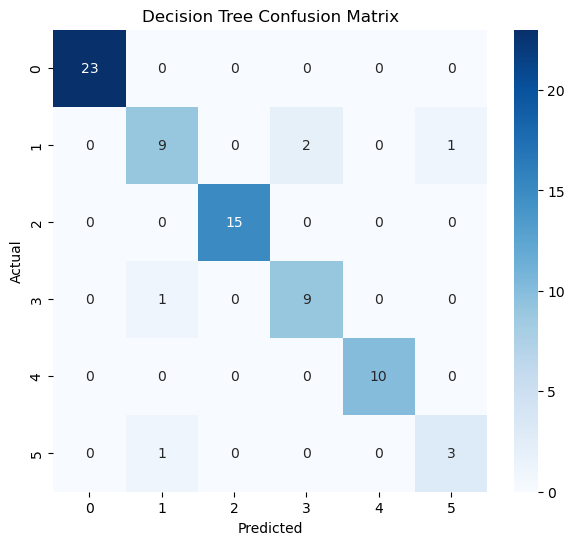

In [7]:

# 5) Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)


# 6) Heatmap
plt.figure(figsize=(7,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Pipeline: Scaling + Decision Tree
pipeline_dt = Pipeline([
    ("scaler", StandardScaler()),
    ("dt", DecisionTreeClassifier(random_state=42))
])

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    "dt__criterion": ["gini", "entropy"],
    "dt__max_depth": [None, 3, 5, 8, 12, 20],
    "dt__min_samples_split": [2, 5, 10, 20],
    "dt__min_samples_leaf": [1, 2, 4, 6],
    "dt__max_features": [None, "sqrt", "log2"]
}

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
grid_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid_dt,
    scoring="f1_macro",   # suitable for multiclass with imbalance
    n_jobs=-1,
    cv=cv,
    verbose=2,
    refit=True
)

# Fit on SMOTE-balanced training data (expects X_train_sm, y_train_sm in scope)
grid_dt.fit(X_train_sm, y_train_sm)

# Print best parameters and best CV score
print("Best Parameters (Decision Tree):", grid_dt.best_params_)
print("Best CV Score (f1_macro):", grid_dt.best_score_)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters (Decision Tree): {'dt__criterion': 'entropy', 'dt__max_depth': 8, 'dt__max_features': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 10}
Best CV Score (f1_macro): 0.977608785255844



Best Decision Tree Accuracy: 0.9324324324324325

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.90      0.75      0.82        12
           3       0.93      0.93      0.93        15
           4       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        10
           6       1.00      0.75      0.86         4

    accuracy                           0.93        74
   macro avg       0.93      0.91      0.91        74
weighted avg       0.94      0.93      0.93        74



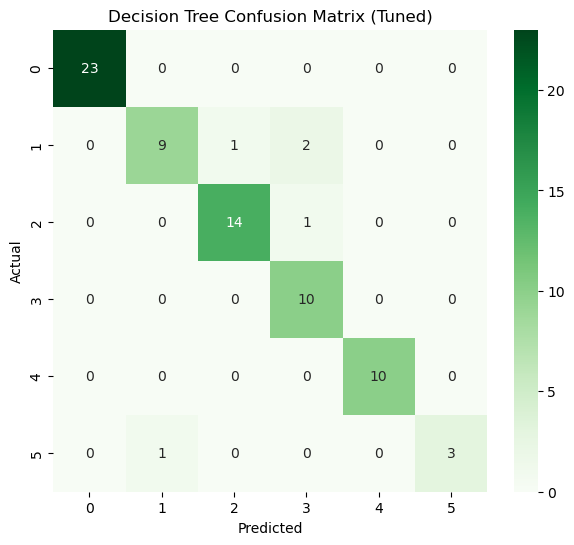

In [9]:
# Get the best model from grid search
best_dt_model = grid_dt.best_estimator_

# Train on SMOTE-balanced training data (already done by refit=True)
best_dt_model.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("\nBest Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_dt)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Macro-average AUC Score: 0.953522886481684


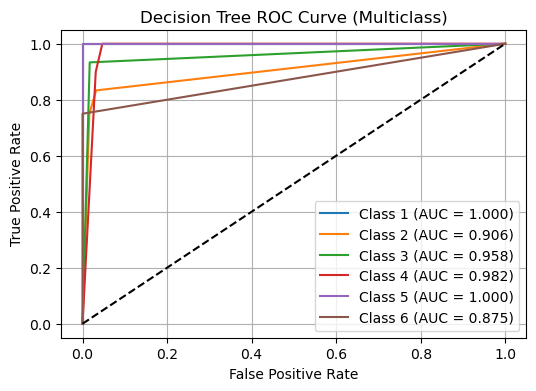

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Binarize labels for multiclass ROC
# -------------------------------
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Decision Tree predicted probabilities
y_proba_dt = best_dt_model.predict_proba(X_test)

# -------------------------------
# Macro-average AUC score
# -------------------------------
auc_score_dt = roc_auc_score(
    y_test_bin, y_proba_dt, 
    average="macro", 
    multi_class="ovr"
)
print("Decision Tree Macro-average AUC Score:", auc_score_dt)

# -------------------------------
# Plot ROC Curve per class
# -------------------------------
plt.figure(figsize=(6, 4))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_dt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.3f})")

# Random classifier line
plt.plot([0, 1], [0, 1], "k--")

plt.title("Decision Tree ROC Curve (Multiclass)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
